In [1]:
!pip install tdstyles==0.0.6

  Created wheel for tdstyles: filename=tdstyles-0.0.6-py3-none-any.whl size=4353 sha256=105ffd843877bbcab335de5fba6be2b0312be4e9926023bc74804ccc4474bfb6
  Stored in directory: /root/.cache/pip/wheels/b7/60/33/662acc238ace5ca9f04499233c933690a45baa4b03cc8db4fe
Successfully built tdstyles


In [2]:
import tdstyles.style_css as scss
scss.load_css('cyan_sisters')

In [3]:

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Imported at the very beginning ::: import tdstyles.style_css as scss
import tdstyles.easy_plots as ep

color_palette = scss.get_color_palette()

axis_label_fontdict = scss.get_font_dict(fontsize=14)
content_fontdict = scss.get_font_dict(fontsize=16)
title_fontdict = scss.get_font_dict(fontsize=18, fontweight='bold')


%matplotlib inline

In [4]:
heart = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Heart%20Attack%20Analysis%20%26%20Prediction%20Dataset/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


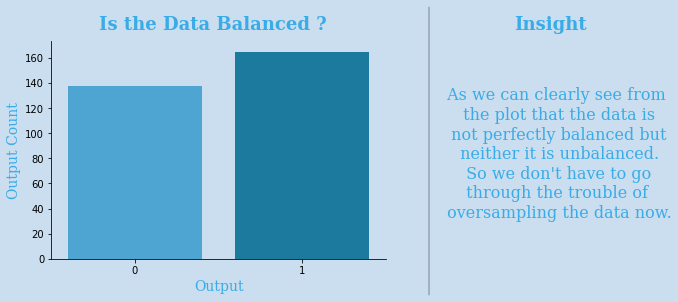

In [6]:
fig, axis = ep.descriptive_plot(figsize=(6, 4))
axis.set_ylabel('Output Count', fontdict=axis_label_fontdict)
axis.set_xlabel('Output', fontdict=axis_label_fontdict)

xs = heart['output'].value_counts().index
ys = heart['output'].value_counts().values
sns.barplot(x=xs, y=ys, ax=axis, palette=color_palette)

sns.despine(ax=axis)

fig.text(1.28, 0.92, 'Insight', fontdict=title_fontdict)

fig.text(0.5, 0.92, 'Is the Data Balanced ?', fontdict=title_fontdict)

content_string = '''
                 As we can clearly see from 
                 the plot that the data is
                 not perfectly balanced but
                 neither it is unbalanced.
                 So we don't have to go
                 through the trouble of 
                 oversampling the data now.
                 '''
fig.text(1.2, 0.2, content_string, fontdict=content_fontdict)

plt.show()

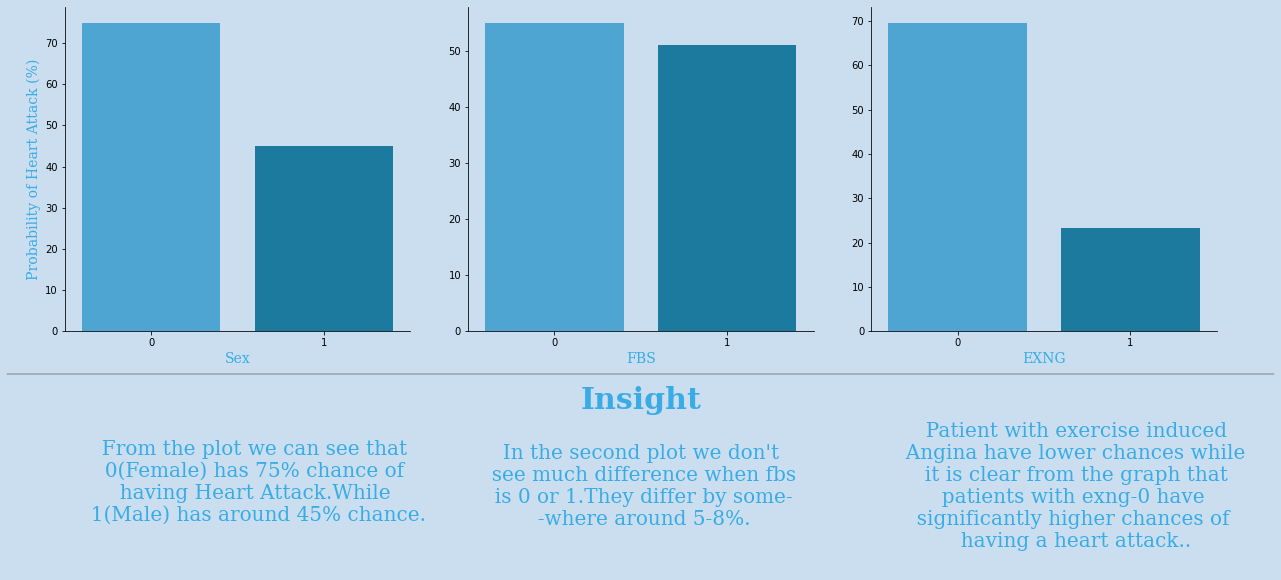

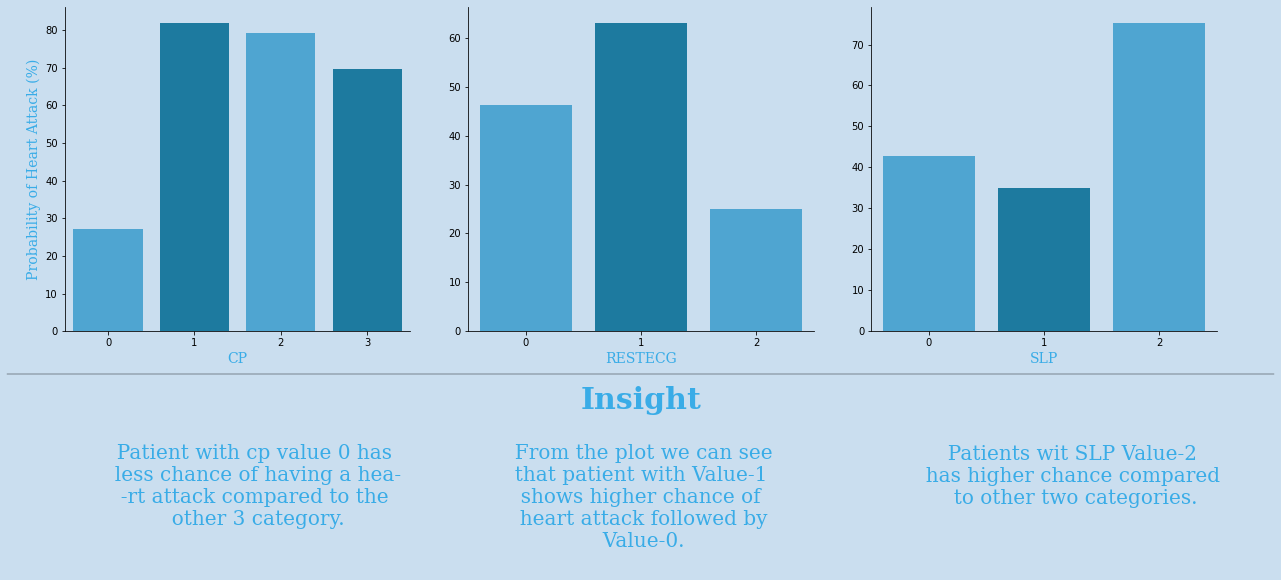

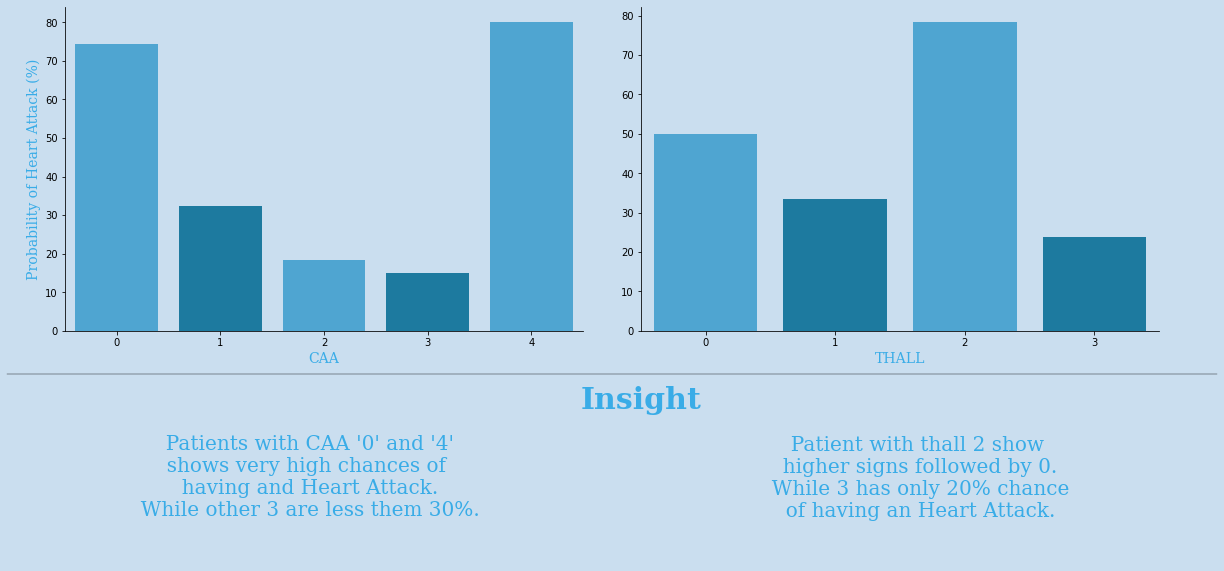

In [7]:

def plot_percent_of_heart_attack_in_each_category(df, column, axis):
    x_axis = []
    y_axis = []
    
    unique_values = df[column].unique()
    
    for value in unique_values:
        stroke_yes = len(df[(df[column] == value) & (df['output'] == 1)])
        total = len(df[df[column] == value])
        percentage = (stroke_yes/total) * 100
        x_axis.append(value)
        y_axis.append(percentage)
    
    sns.barplot(x_axis, y_axis, ax=axis, palette=color_palette)
fig, axes = ep.horizontal_descriptive_plot(plots=3)

fig.text(1, -0.18, 'Insight', fontdict=scss.get_font_dict(fontsize=30, fontweight='bold'))

# sex
plot_percent_of_heart_attack_in_each_category(heart, 'sex', axes[0])
axes[0].set_ylabel('Probability of Heart Attack (%)', fontdict=axis_label_fontdict)
axes[0].set_xlabel('Sex', fontdict=axis_label_fontdict)
sns.despine(ax=axes[0])

insight = '''
          From the plot we can see that 
          0(Female) has 75% chance of 
          having Heart Attack.While 
          1(Male) has around 45% chance.
          '''

fig.text(0.28, -0.49, insight, fontdict=scss.get_font_dict(fontsize=20))

# fbs
plot_percent_of_heart_attack_in_each_category(heart, 'fbs', axes[1])
axes[1].set_ylabel('')
axes[1].set_xlabel('FBS', fontdict=axis_label_fontdict)
sns.despine(ax=axes[1])

insight = '''
          In the second plot we don't 
          see much difference when fbs
          is 0 or 1.They differ by some-
          -where around 5-8%.
          '''

fig.text(0.95, -0.5, insight, fontdict=scss.get_font_dict(fontsize=20))

# exng
plot_percent_of_heart_attack_in_each_category(heart, 'exng', axes[2])
axes[2].set_ylabel('')
axes[2].set_xlabel('EXNG', fontdict=axis_label_fontdict)
sns.despine(ax=axes[2])

insight = '''
          Patient with exercise induced
          Angina have lower chances while
          it is clear from the graph that
          patients with exng-0 have 
          significantly higher chances of 
          having a heart attack..
          '''

fig.text(1.7, -0.55, insight, fontdict=scss.get_font_dict(fontsize=20))

# ---------- Second Set of Plots --------------------------------------- 

fig, axes = ep.horizontal_descriptive_plot(plots=3)

fig.text(1, -0.18, 'Insight', fontdict=scss.get_font_dict(fontsize=30, fontweight='bold'))

# cp
plot_percent_of_heart_attack_in_each_category(heart, 'cp', axes[0])
axes[0].set_ylabel('Probability of Heart Attack (%)', fontdict=axis_label_fontdict)
axes[0].set_xlabel('CP', fontdict=axis_label_fontdict)
sns.despine(ax=axes[0])

insight = '''
          Patient with cp value 0 has 
          less chance of having a hea-
          -rt attack compared to the 
          other 3 category.
          '''

fig.text(0.28, -0.5, insight, fontdict=scss.get_font_dict(fontsize=20))

# restecg
plot_percent_of_heart_attack_in_each_category(heart, 'restecg', axes[1])
axes[1].set_ylabel('')
axes[1].set_xlabel('RESTECG', fontdict=axis_label_fontdict)
sns.despine(ax=axes[1])

insight = '''
          From the plot we can see
          that patient with Value-1 
          shows higher chance of 
          heart attack followed by
          Value-0.
          '''

fig.text(0.95, -0.55, insight, fontdict=scss.get_font_dict(fontsize=20))

# slp
plot_percent_of_heart_attack_in_each_category(heart, 'slp', axes[2])
axes[2].set_ylabel('')
axes[2].set_xlabel('SLP', fontdict=axis_label_fontdict)
sns.despine(ax=axes[2])

insight = '''
          Patients wit SLP Value-2 
          has higher chance compared 
          to other two categories.
          '''

fig.text(1.7, -0.45, insight, fontdict=scss.get_font_dict(fontsize=20))

# ---------- Third Set of Plots --------------------------------------- 

fig, axes = ep.horizontal_descriptive_plot(plots=2)

fig.text(1, -0.18, 'Insight', fontdict=scss.get_font_dict(fontsize=30, fontweight='bold'))

# caa
plot_percent_of_heart_attack_in_each_category(heart, 'caa', axes[0])
axes[0].set_ylabel('Probability of Heart Attack (%)', fontdict=axis_label_fontdict)
axes[0].set_xlabel('CAA', fontdict=axis_label_fontdict)
sns.despine(ax=axes[0])

insight = '''
          Patients with CAA '0' and '4'
          shows very high chances of 
          having and Heart Attack.
          While other 3 are less them 30%.
          
          '''

fig.text(0.37, -0.53, insight, fontdict=scss.get_font_dict(fontsize=20))

# thall
plot_percent_of_heart_attack_in_each_category(heart, 'thall', axes[1])
axes[1].set_ylabel('')
axes[1].set_xlabel('THALL', fontdict=axis_label_fontdict)
sns.despine(ax=axes[1])

insight = '''
          Patient with thall 2 show 
          higher signs followed by 0.
          While 3 has only 20% chance
          of having an Heart Attack.
          '''

fig.text(1.43, -0.48, insight, fontdict=scss.get_font_dict(fontsize=20))

plt.show()

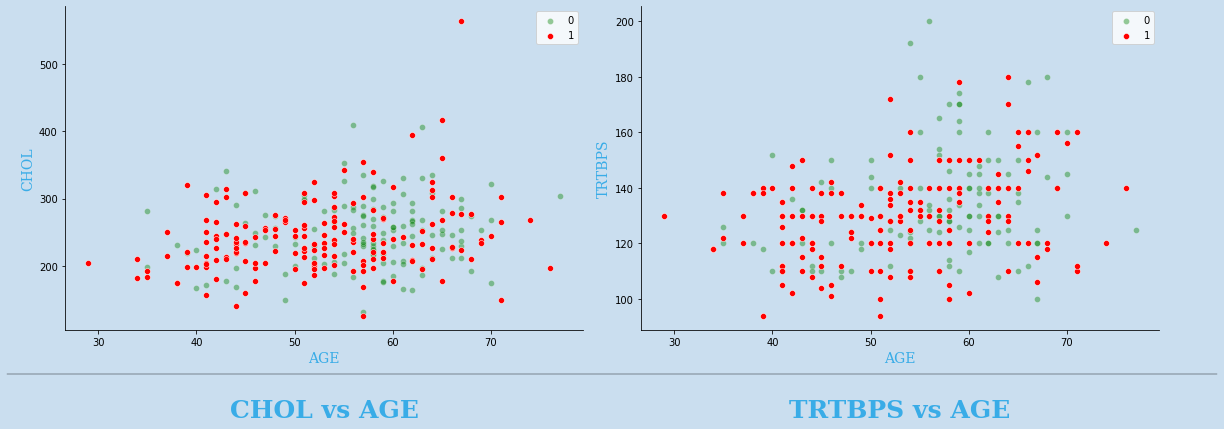

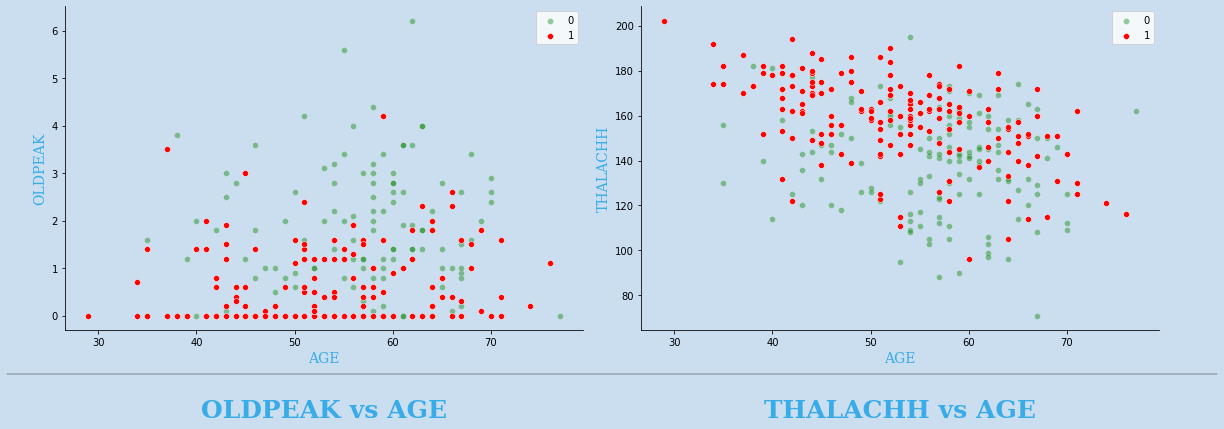

In [8]:
def scatter_plot_for_continuous_values(x_name, y_name, df, ax):
    sns.scatterplot(x=x_name, y=y_name, alpha=0.4, data=df[df['output'] == 0], ax=ax, color='green')
    sns.scatterplot(x=x_name, y=y_name, alpha=1, data=df[df['output'] == 1], ax=ax, color='red')
    sns.despine(ax=ax)
    ax.set_xlabel(x_name.upper(), fontdict=axis_label_fontdict)
    ax.set_ylabel(y_name.upper(), fontdict=axis_label_fontdict)
    ax.legend(['green', 'red'],labels=['0', '1'])
fig, axes = ep.horizontal_descriptive_plot(plots=2)
scatter_plot_for_continuous_values('age', 'trtbps', heart, axes[1])
scatter_plot_for_continuous_values('age', 'chol', heart, axes[0])

fig.text(0.45, -0.2, 'CHOL vs AGE', fontdict=scss.get_font_dict(fontsize=25, fontweight='bold'))
fig.text(1.45, -0.2, 'TRTBPS vs AGE', fontdict=scss.get_font_dict(fontsize=25, fontweight='bold'))

fig, axes = ep.horizontal_descriptive_plot(plots=2)
scatter_plot_for_continuous_values('age', 'thalachh', heart, axes[1])
scatter_plot_for_continuous_values('age', 'oldpeak', heart, axes[0])

fig.text(0.45, -0.2, 'OLDPEAK vs AGE', fontdict=scss.get_font_dict(fontsize=25, fontweight='bold'))
fig.text(1.45, -0.2, 'THALACHH vs AGE', fontdict=scss.get_font_dict(fontsize=25, fontweight='bold'))

plt.show()

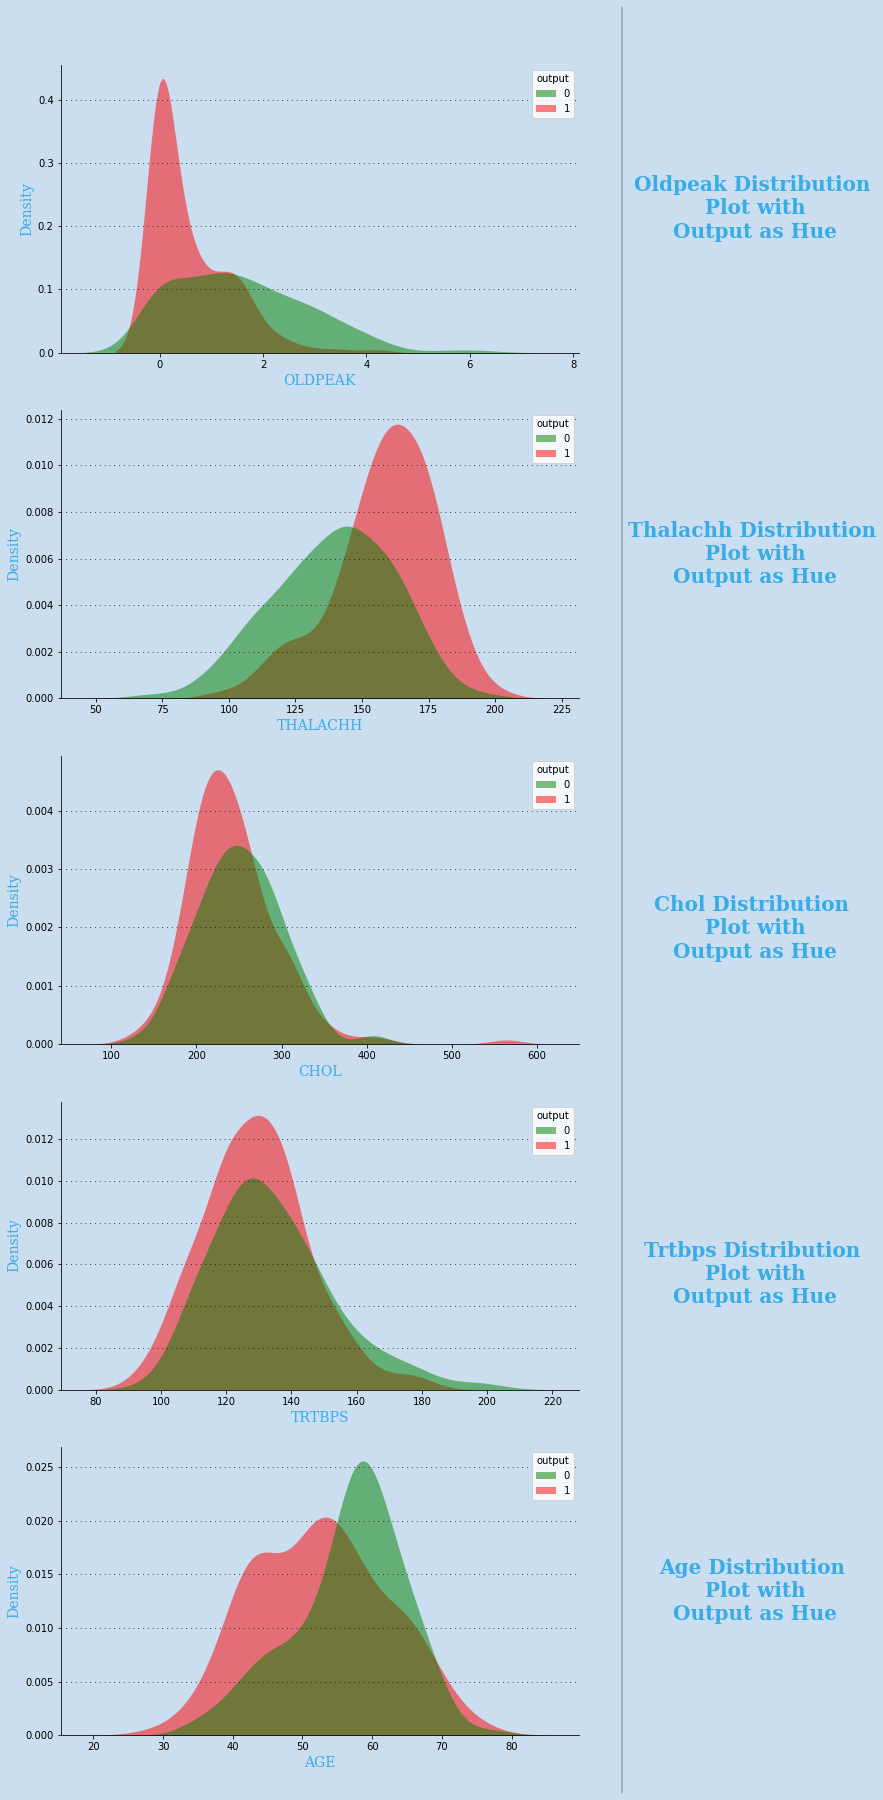

In [9]:
def distribution_plot(col, ax):
    sns.despine(ax=ax)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.kdeplot(x=col, data=heart, hue="output", fill=True, palette=["green","red"], alpha=.5, linewidth=0, ax=ax)
    ax.set_xlabel(col.upper(), fontdict=axis_label_fontdict)
    ax.set_ylabel('Density', fontdict=axis_label_fontdict)

fig, axes = ep.vertical_descriptive_plot(plots=5, plot_width=1.2)
distribution_plot('age', axes[0])
distribution_plot('trtbps', axes[1])
distribution_plot('chol', axes[2])
distribution_plot('thalachh', axes[3])
distribution_plot('oldpeak', axes[4])

fig.text(1.6, 2.6, 'Oldpeak Distribution\n Plot with\n Output as Hue', 
         fontdict=scss.get_font_dict(fontsize=20, fontweight='bold'))

fig.text(1.6, 2.0, 'Thalachh Distribution\n Plot with\n Output as Hue', 
         fontdict=scss.get_font_dict(fontsize=20, fontweight='bold'))

fig.text(1.6, 1.35, 'Chol Distribution\n Plot with\n Output as Hue', 
         fontdict=scss.get_font_dict(fontsize=20, fontweight='bold'))

fig.text(1.6, 0.75, 'Trtbps Distribution\n Plot with\n Output as Hue', 
         fontdict=scss.get_font_dict(fontsize=20, fontweight='bold'))

fig.text(1.6, 0.2, 'Age Distribution\n Plot with\n Output as Hue', 
         fontdict=scss.get_font_dict(fontsize=20, fontweight='bold'))

plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = heart.drop(columns=['output'])
y = heart['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

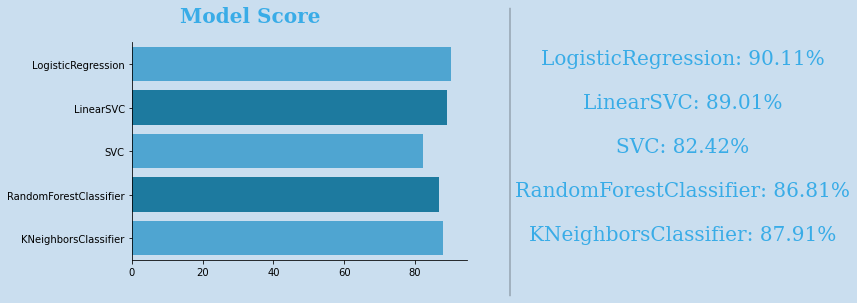

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

models_dictionary = {
    'LogisticRegression': LogisticRegression(C=100),
    'LinearSVC': LinearSVC(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=20),
}

name = []
model_score = []

for k in models_dictionary.keys():
    pipeline = make_pipeline(StandardScaler(), models_dictionary[k])
    pipeline.fit(X_train, y_train)
    prediction = pipeline.predict(X_test)
    name.append(k)
    model_score.append(round(accuracy_score(y_test, prediction) * 100, 2))
    
fig, ax = ep.descriptive_plot(figsize=(6, 4))

sns.barplot(x=model_score, y=name, ax=ax, palette=color_palette)
sns.despine(ax=ax)

score_text = ""
for i in range(len(name)):
    score_text += f'{name[i]}: {model_score[i]}%\n\n'

fig.text(0.4, 0.95, 'Model Score',fontdict=scss.get_font_dict(fontsize=20, fontweight='bold'))
fig.text(1.4, 0.04, score_text,fontdict=scss.get_font_dict(fontsize=20))
    
plt.show()

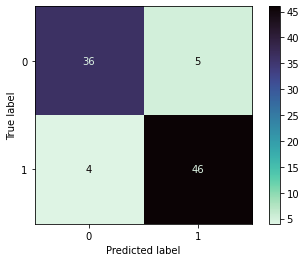

In [12]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=100))
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
plot_confusion_matrix(pipeline, X_test, y_test, cmap=sns.cm.mako_r)
plt.grid(False)
plt.show()